# Exercises for Video Lecture 2
Corresponds to Chapters 2 & 3 of the book.

In [293]:
import arviz as az
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import style
from scipy.stats import binom

from stats_helpers import binomial_posterior, binomial_ppd

# Set the style from the mplstyle file
STYLE = "../statistical-rethinking-2023.mplstyle"
style.use(STYLE)


## Chapter 2
### Exercise 2M1
Recall the globe tossing model from the chapter. Compute and plot the 
grid approximate posterior distribution for each of the following sets of observations.
In each case, assume a uniform prior for $p$.
1. W, W, W
2. W, W, W, L
3. L, W, W, L, W, W, W

In [294]:
data_samples = [
    "WWW",
    "WWWL",
    "LWWLWWW"
]
# Convert the data samples to boolean arrays
data_arrays = [
    np.array([i == "W" for i in sample]) for sample in data_samples
]

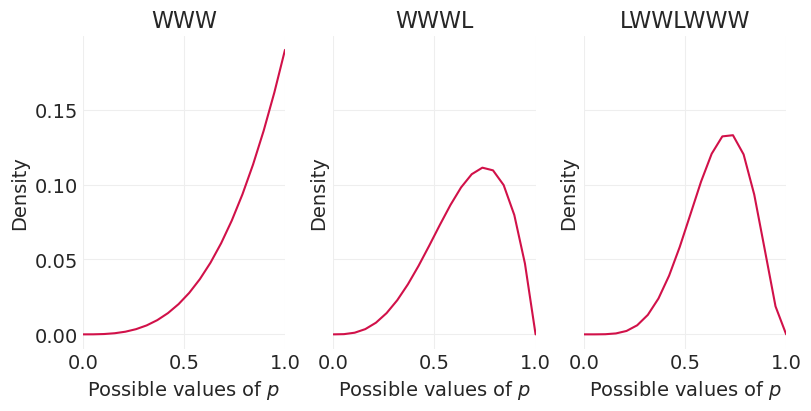

In [295]:
fig, ax = plt.subplots(1, 3, figsize=(8, 4), sharey=True, sharex=True)

density_xlabel = "Possible values of $p$"
density_ylabel = "Density"

for i, sample in enumerate(data_samples):
    arr = data_arrays[i]
    axi = ax[i]
    p_grid, posterior = binomial_posterior(arr, 20)
    axi.plot(p_grid, posterior)
    axi.set_xlim(0, 1)
    axi.set_title(sample)
    axi.set_xlabel(density_xlabel)
    axi.set_ylabel(density_ylabel)

## Exercise 2M2
Now assume a prior for $p$ that is equal to zero when $p < 0.5$ and
is a positive constant when $p ≥ 0.5$.

Again compute and plot the grid approximate posterior distribution
for each of the sets of observations in the problem just above.

In [296]:
# Prior is defined on the [0, 1] interval and is 0 before 0.5 and uniform
# after 0.5. The values > 0.5 are set to 2 to make th integral sum to 1.
modified_prior = np.zeros(20)
modified_prior[10:] = 2 


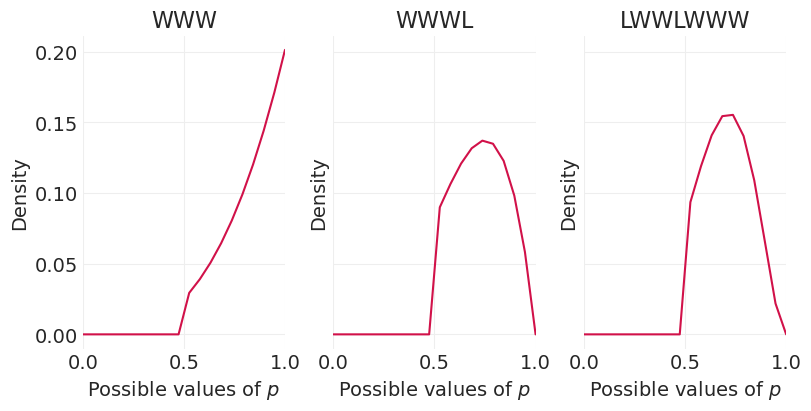

In [297]:
fig, ax = plt.subplots(1, 3, figsize=(8, 4), sharey=True, sharex=True)

for i, sample in enumerate(data_samples):
    arr = data_arrays[i]
    axi = ax[i]
    p_grid, posterior = binomial_posterior(arr, 20, prior=modified_prior)
    axi.plot(p_grid, posterior)
    axi.set_xlim(0, 1)
    axi.set_title(sample)
    axi.set_xlabel(density_xlabel)
    axi.set_ylabel(density_ylabel)

## Chapter 3
The following Easy problems use the samples from the posterior 
distribution for the globe tossing example.

This code will give you a specific set of samples,
so that you can check your answers exactly.

This is the R code:
```r
p_grid <-seq(from=0,to=1,length.out=1000)
prior <-rep(1,1000)
likelihood <-dbinom(6,size=9,prob=p_grid)
posterior <-likelihood*prior
posterior <-posterior/sum(posterior)
set.seed(100)
samples <-sample(p_grid,prob=posterior,size=1e4,replace=TRUE)
```

And below is the equivalent Python code:

In [298]:
p_grid = np.linspace(0, 1, 1000)
prior = np.ones(1000)
likelihood = binom.pmf(6, 9, p_grid)
posterior = prior * likelihood
posterior /= np.sum(posterior)
rng = np.random.default_rng(100)
samples = rng.choice(p_grid, size=10_000, replace=True, p=posterior)

### Exercises 3E1 - 3E7
- How much posterior probability lies below $p = 0.2$?
- How much posterior probability lies above $p = 0.8$?
- How much posterior probability lies between $p = 0.2$ and $p = 0.8$?

In [299]:
print((samples < 0.2).mean())
print((samples > 0.8).mean())
print(((samples > 0.2) & (samples < 0.8)).mean())

0.0013
0.1155
0.8832


- 20% of the posterior probability lies below which value of $p$?
- 20% of the posterior probability lies above which value of $p$?

In [300]:
lower, upper = np.percentile(samples, [20, 80])
print(f"{lower:.2f} - {upper:.2f}")

0.52 - 0.76


- Which values of $p$ contain the narrowest interval equal to 66% of the posterior probability?
- Which values of $p$ contain 66% of the posterior probability, assuming equal posterior probability both below and above the interval?

In [301]:
print("HDPI 66%")
lower, upper = az.hdi(samples, hdi_prob=0.66)
print(f"{lower:.2f} - {upper:.2f}")

print("\nPI 66%")
lower, upper = np.percentile(samples, [34/2, 100 - 34/2])
print(f"{lower:.2f} - {upper:.2f}")

HDPI 66%
0.52 - 0.79

PI 66%
0.50 - 0.77


### Exercise 3M1

Suppose the globe tossing data had turned out to be 8 water in 15 tosses.

Construct the posterior distribution, using grid approximation.

Use the same flat prior as before.

In [302]:
p_grid = np.linspace(0, 1, 1000)
prior = np.ones(1000)
likelihood = binom.pmf(8, 15, p_grid)
posterior = prior * likelihood
posterior /= np.sum(posterior)
rng = np.random.default_rng(100)

Text(0, 0.5, 'Density')

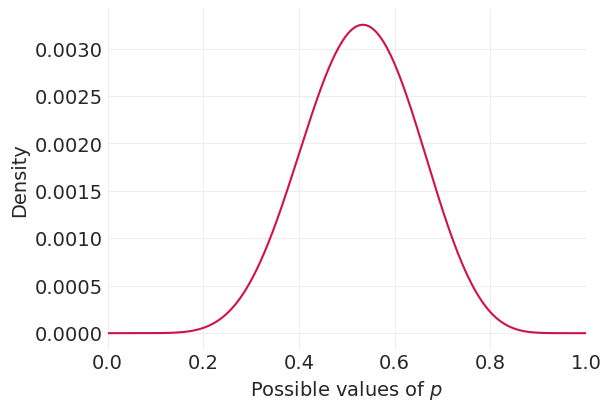

In [303]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(p_grid, posterior)
ax.set_xlim(0, 1)
ax.set_xlabel(density_xlabel)
ax.set_ylabel(density_ylabel)

### Exercise 3M2
Draw 10,000 samples from the grid approximation from above.

Then use the sample to calculate the 90% HPDI for p.

In [304]:
samples = rng.choice(p_grid, size=10_000, replace=True, p=posterior)

Text(0, 0.5, 'Density')

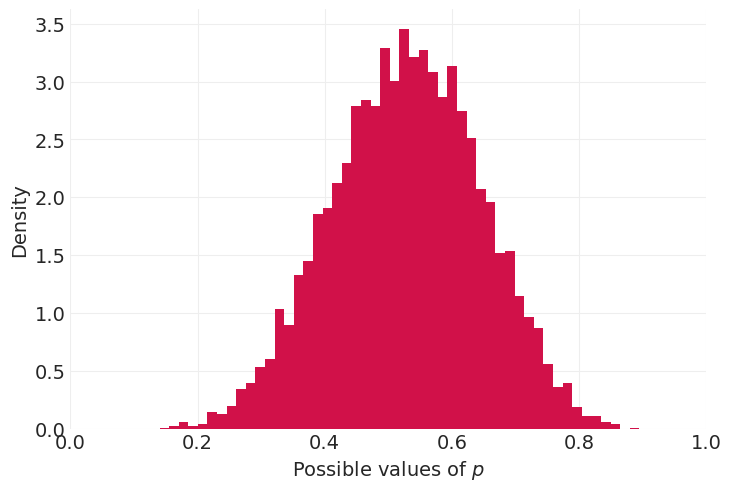

In [305]:
plt.hist(samples, bins=50, density=True)
plt.xlim(0, 1)
plt.xlabel(density_xlabel)
plt.ylabel(density_ylabel)

In [306]:
lower, upper = az.hdi(samples, hdi_prob=0.9)
print(f"{lower:.2f} - {upper:.2f}")

0.33 - 0.72


### Exercise 3M3
Construct a posterior predictive check for this model and data.

This means simulate the distribution of samples, averaging over the posterior uncertainty in p.

What is the probability of observing 8 water in 15 tosses?

In [307]:
# Compute the posterior predictive distribution by sampling from the posterior
# and then computing the binomial distribution for each sample.
ppd = binom.rvs(15, samples, size=10_000, random_state=rng)  # n ,p, size
print((ppd == 8).mean())

0.1502


### Exercise 3M4
Using the posterior distribution constructed from the new (8/15) data, now calculate the probability of observing 6 water in 9 tosses.

In [308]:
# Compute the probability of observing 6 water in 9 tosses given a posterior
# distribution of p.
ppd = binom.rvs(9, samples, size=10_000, random_state=rng)
print((ppd == 6).mean())

0.1847


### Exercise 3M5
Start over at 3M1, but now use a prior that is zero below $p = 0.5$ and a constant above $p = 0.5$.
This corresponds to prior information that a majority of the Earth's surface is water.
Repeat each problem above and compare the inferences (using both priors) to the true value $p = 0.7.$

In [309]:
p_grid = np.linspace(0, 1, 1000)
modified_prior = np.zeros(1000)
modified_prior[500:] = 2
modified_likelihood = binom.pmf(8, 15, p_grid)
modified_posterior = modified_prior * modified_likelihood
modified_posterior /= np.sum(modified_posterior)

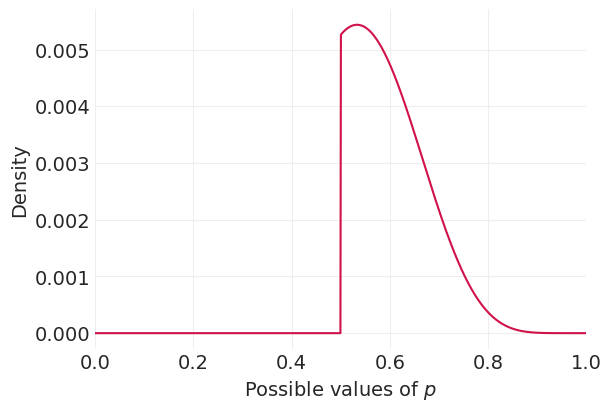

In [310]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(p_grid, modified_posterior)
ax.set_xlim(0, 1)
ax.set_xlabel(density_xlabel)
ax.set_ylabel(density_ylabel);

Text(0, 0.5, 'Density')

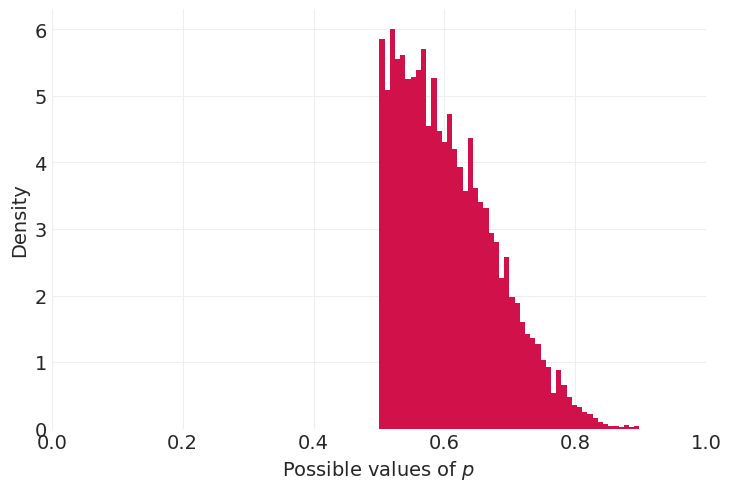

In [311]:
modified_samples = rng.choice(p_grid, size=10_000, replace=True, p=modified_posterior)
plt.hist(modified_samples, bins=50, density=True)
plt.xlim(0, 1)
plt.xlabel(density_xlabel)
plt.ylabel(density_ylabel)

In [312]:
lower, upper = az.hdi(modified_samples, hdi_prob=0.9)
print(f"{lower:.2f} - {upper:.2f}")

0.50 - 0.71


In [313]:
modified_ppd = binom.rvs(15, modified_samples, size=10_000, random_state=rng)  # n ,p, size
print((modified_ppd == 8).mean())

0.1561


In [314]:
modified_ppd = binom.rvs(9, modified_samples, size=10_000, random_state=rng)
print((ppd == 6).mean())

0.1847


### Exercise 3M6
Suppose you want to estimate the Earth's proportion of water very precisely.
Specifically, you want the 99% percentile interval of the posterior distribution of $p$ to be only 0.05 wide.
This means the distance between the upper and lower bound of the interval should be 0.05.
How many times will you have to toss the globe to do this?

In [315]:
def calculate_interval_width(n_trials):
    """Calculate the width of an interval that contains 99% of the posterior
    distribution of a binomial distribution with p = 0.7, after observing
    n_trials (tosses).
    """
    p_grid = np.linspace(0, 1, 1000) # Define the grid of possible values of p
    prior = np.ones(1000)   # uniform prior

    # simulate the experiment (1 series of n_trials tosses)
    # to get the observed number of water nW
    nW = binom.rvs(n_trials, 0.7, size=1)
    # compute the posterior using the observed nW
    likelihood = binom.pmf(nW, n_trials, p_grid)
    posterior = prior * likelihood
    posterior /= np.sum(posterior)
    # sample from the posterior
    samples = rng.choice(p_grid, size=10_000, replace=True, p=posterior)
    # calculate the width of a 99% percentile interval
    tail_width = (1 - 0.99) / 2
    lower, upper = np.quantile(samples, [tail_width, 1 - tail_width])
    return upper - lower

In [316]:
# Define the values of n_trials for which we want to calculate the width
trials_grid = np.arange(0, 3001, 50)

widths_per_exp = []
min_trials_per_exp = []
# Do the experiment 20 times (different random seeds each time)
# and average the results
for _ in range(20):
    # Calculate the width of the interval for each number of trials
    widths = np.array(
        [calculate_interval_width(n_trials) for n_trials in trials_grid]
    )
    # Find the smallest number of trials that results in a width of 0.05
    min_n_trials = trials_grid[np.nonzero(widths <= 0.05)].min()
    widths_per_exp.append(widths)
    min_trials_per_exp.append(min_n_trials)

In [317]:
# Calculate the mean and std (across 20 experiments)
# of the number of trials to reach 0.05 width
print(f"{np.mean(min_trials_per_exp):.2f} +/- {np.std(min_trials_per_exp):.2f}")

2247.50 +/- 46.03


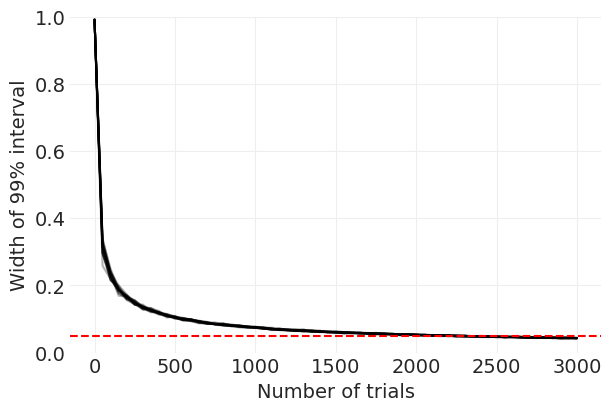

In [318]:
fig, ax = plt.subplots(figsize=(6, 4))
for widths in widths_per_exp:
    ax.plot(trials_grid, widths, color="black", alpha=0.3)

ax.axhline(0.05, color="red", linestyle="--")
ax.set_ylim(0, 1)
ax.set_xlabel("Number of trials")
ax.set_ylabel("Width of 99% interval");

### Data for hard exercises
The Hard problems here all use the data below. These data indicate the gender (male = 1, female = 0) of
officially reported first and second born children in 100 two-child families.
So for example, the first family in the data reported a boy (1) and then a girl (0).
The second family reported a girl (0) and then a boy (1).

```r
data(homeworkch3)
birth1
#>   [1] 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1
#>  [38] 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1
#>  [75] 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1
birth2
#>   [1] 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0
#>  [38] 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0
#>  [75] 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0
```
Use these vectors as data. So for example to compute the total number of boys
born across all of these births, you could use

```r
sum(birth1) + sum(birth2)
#> [1] 111
```


In [319]:
# Convert R vectors to numpy arrays
birth1 = np.array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 
                   1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 
                   0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 
                   0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
                   1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

birth2 = np.array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 
                   0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 
                   1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 
                   1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 
                   0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

### Exercise 3H1
Using grid approximation, compute the posterior distribution for the probability
of a birth being a boy.

Assume a uniform prior probability. 

Which parameter value maximizes the posterior probability?

In [320]:
# Combine the data across the two births
birth_data = np.concatenate([birth1, birth2]).astype(bool)
p_grid, boy_posterior = binomial_posterior(birth_data, 1000)

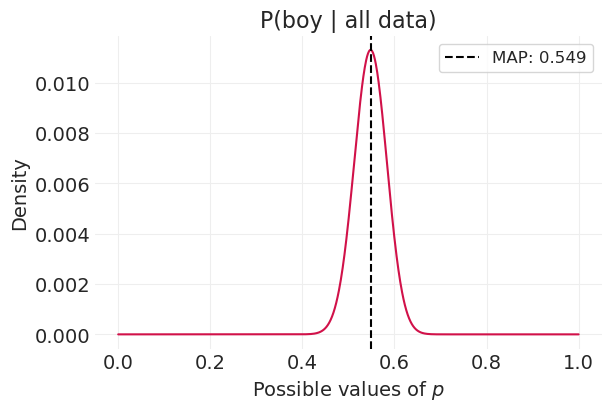

In [321]:
map_boy = p_grid[np.argmax(boy_posterior)]
map_str = f"MAP: {map_boy:.3f}"
plt.figure(figsize=(6, 4))
plt.plot(p_grid, boy_posterior)
plt.axvline(map_boy, color="k", linestyle="--", label=map_str)
plt.xlabel(density_xlabel)
plt.ylabel(density_ylabel)
plt.legend()
plt.title("P(boy | all data)");

### Exercise 3H2

Using the sample function, draw 10,000 random parameter values from the posterior distribution you calculated above.
Use these sample to estimate the 50%, 89%, and 97% highest posterior density intervals.

In [322]:
samples_boy_posterior = rng.choice(p_grid, size=10_000, replace=True, p=boy_posterior)

In [323]:
for interval in [50, 89, 97]:
    lower, upper = az.hdi(samples, hdi_prob=interval/100)
    print(f"{interval}% HDPI: {lower:.3f} - {upper:.3f}")

50% HDPI: 0.445 - 0.608
89% HDPI: 0.343 - 0.717
97% HDPI: 0.269 - 0.761


### Exercise 3H3
Use `rbinom` to simulate 10,000 replicates of 200 births.
You should end up with 10,000 numbers, each one a count of boys out of 200 births.
Compare the distribution of predicted numbers of boys to the actual count in the data (111 boys out of 200 births).

There are many good ways to visualize the simulations, but the `dens` command 
(part of the rethinking package) is prbably the easiest way in this case.

Does it look like the model fits the data well?
That is, does the distribution of predictions include the actual observation as a central, likely outcome?

In [324]:
# simulate 10.000 replicates of 200 births (posterior predictive distribution)
ppd_boy = binom.rvs(200, samples_boy_posterior, size=10_000, random_state=rng)

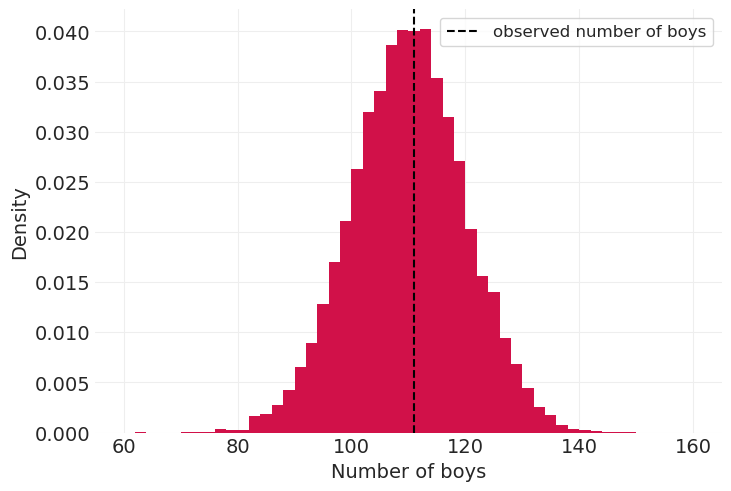

In [325]:
plt.hist(ppd_boy, density=True, bins=np.arange(60, 161, 2))
plt.axvline(111, color="k", linestyle="--", label="observed number of boys")
plt.xlabel("Number of boys")
plt.ylabel(density_ylabel)
plt.legend();

### Exercise 3H4
Now compare 10,000 counts of boys from 100 simulated first borns only the number of boys in the first births, birth1.
How does the model look in this light?

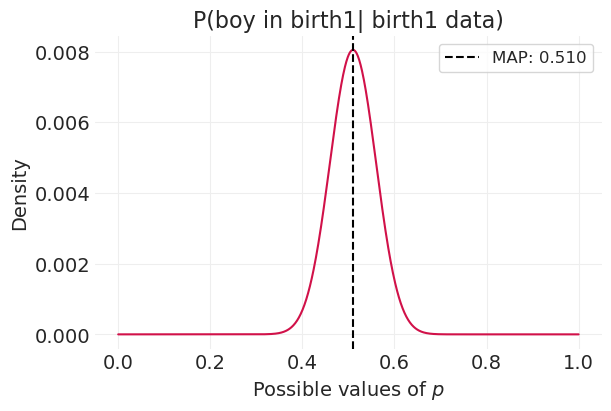

In [326]:
p_grid, boy1_posterior = binomial_posterior(birth1, 1000)
map_boy1 = p_grid[np.argmax(boy1_posterior)]
map_str = f"MAP: {map_boy1:.3f}"
plt.figure(figsize=(6, 4))
plt.plot(p_grid, boy1_posterior)
plt.axvline(map_boy1, color="k", linestyle="--", label=map_str)
plt.xlabel(density_xlabel)
plt.ylabel(density_ylabel)
plt.legend()
plt.title("P(boy in birth1| birth1 data)");

In [327]:
# Here we sample from the overall posterior (not the posterior for birth1)
ppd_boy1 = binom.rvs(100, samples_boy_posterior, size=10_000, random_state=rng)

51 boys in birth1


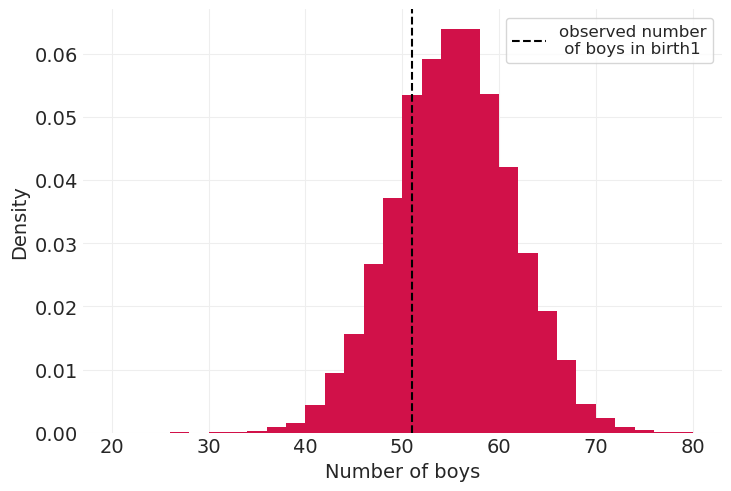

In [328]:
observed_boys_in_birth1 = birth1.sum()
print(f"{observed_boys_in_birth1} boys in birth1")
plt.hist(ppd_boy1, density=True, bins=np.arange(20, 81, 2))
plt.axvline(observed_boys_in_birth1, color="k", linestyle="--", label="observed number\n of boys in birth1")
plt.xlabel("Number of boys")
plt.ylabel(density_ylabel)
plt.legend();

### Exercise 3H5
The model assumes that sex of first and second births are independent.

To check this assumption, focus now on second births that followed female first borns.
Compare 10,000 simulated conts of boys to only those second births that followed girls.
To do this correctly, you need to count the number of first borns who were girls and simulate that many births, 10,000 times.

Compare the counts of boys in your simulations to the actual observed count of boys following girls. How does the model look in this light? Any guesses what is going on in these data?

In [329]:
firstborn_is_girl_idx = np.nonzero(birth1 == 0)
birth1_subset = birth1[firstborn_is_girl_idx]
n_firstborn_girls = len(birth1_subset)
print(f"{n_firstborn_girls} firstborn children are girls.")
birth2_subset = birth2[firstborn_is_girl_idx]

observed_boys = birth2_subset.sum()
print(f"In these families, there are {observed_boys} 2nd-born boys.")

49 firstborn children are girls.
In these families, there are 37 2nd-born boys.


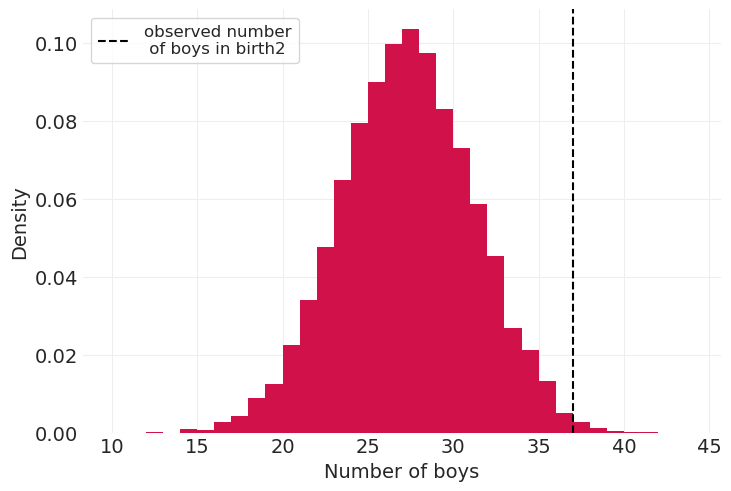

In [330]:
# Here we sample from the overall boy posterior (assuming independence of births)
ppd_boy = binom.rvs(n_firstborn_girls, samples_boy_posterior, size=10_000, random_state=rng)

plt.hist(ppd_boy, density=True, bins=np.arange(10, 45, 1))
plt.axvline(observed_boys, color="k", linestyle="--", label="observed number\n of boys in birth2")
plt.xlabel("Number of boys")
plt.ylabel(density_ylabel)
plt.legend();